<a href="https://colab.research.google.com/github/fabehashahzad/CNN-model-on-cifar-10/blob/main/chucklenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of x_train_mini is (900, 32, 32, 3)
Shape of x_valid_mini is (300, 32, 32, 3)
Shape of x_test_mini is (300, 32, 32, 3)
Shape of y_train_cat_mini is (900, 10)
Shape of y_valid_cat_mini is (300, 10)
Shape of y_test_cat_mini is (300, 10)
Epoch 1/30
29/29 [==============================] - 3s 18ms/step - loss: 2.7084 - accuracy: 0.0878 - val_loss: 2.3032 - val_accuracy: 0.1300
Epoch 2/30
29/29 [==============================] - 0s 10ms/step - loss: 2.3020 - accuracy: 0.1156 - val_loss: 2.3013 - val_accuracy: 0.1067
Epoch 3/30
29/29 [==============================] - 0s 9ms/step - loss: 2.3023 - accuracy: 0.1044 - val_loss: 2.2954 - val_accuracy: 0.1567
Epoch 4/30
29/29 [==============================] - 0s 8ms/step - loss: 2.2894 - accuracy: 0.1211 - val_loss: 2.2772 - val_accuracy: 0.1400
Epoch 5/30
29/29 [==============================] - 0s 8ms/step - loss: 2.2772 - accuracy: 0.1222 - val_loss: 2.2330 - val_accuracy: 0.1767
Epoch 6/30
29/29 [==============================] - 0s 8m

<Axes: >

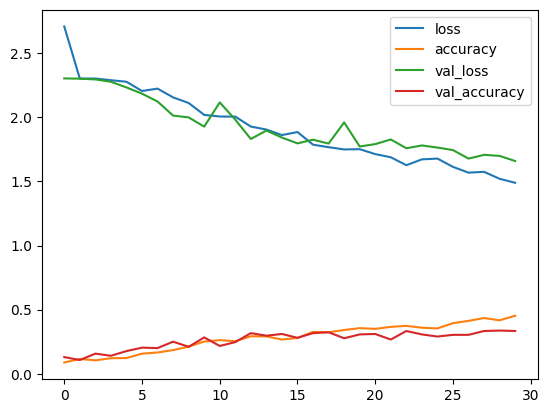

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import pandas as pd

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Choose the first 150 images in each class
num_images_per_class = 150
selected_indices = np.concatenate([np.where(y_train == i)[0][:num_images_per_class] for i in range(10)])

x_mini = x_train[selected_indices]
y_mini = y_train[selected_indices]

# Split the MINI CIFAR-10 dataset into train (60%), valid (20%), and test (20%) sets with equal class distribution
x_train_mini, x_temp, y_train_mini, y_temp = train_test_split(x_mini, y_mini, test_size=0.4, stratify=y_mini)
x_valid_mini, x_test_mini, y_valid_mini, y_test_mini = train_test_split(x_temp, y_temp, test_size=0.5, stratify=y_temp)

# Normalizing
x_train_mini = x_train_mini / 255.0
x_valid_mini = x_valid_mini / 255.0
x_test_mini = x_test_mini / 255.0

# One-hot encoding
y_train_cat_mini = to_categorical(y_train_mini, 10)
y_valid_cat_mini = to_categorical(y_valid_mini, 10)
y_test_cat_mini = to_categorical(y_test_mini, 10)

# Print shapes
print('Shape of x_train_mini is {}'.format(x_train_mini.shape))
print('Shape of x_valid_mini is {}'.format(x_valid_mini.shape))
print('Shape of x_test_mini is {}'.format(x_test_mini.shape))
print('Shape of y_train_cat_mini is {}'.format(y_train_cat_mini.shape))
print('Shape of y_valid_cat_mini is {}'.format(y_valid_cat_mini.shape))
print('Shape of y_test_cat_mini is {}'.format(y_test_cat_mini.shape))

# Define the model (Chucklenet)
Chucklenet = Sequential()
Chucklenet.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
Chucklenet.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
Chucklenet.add(MaxPool2D((2, 2)))
Chucklenet.add(Dropout(0.2))
Chucklenet.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
Chucklenet.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
Chucklenet.add(MaxPool2D((2, 2)))
Chucklenet.add(Dropout(0.3))
Chucklenet.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
Chucklenet.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
Chucklenet.add(MaxPool2D((2, 2)))
Chucklenet.add(Dropout(0.4))
Chucklenet.add(Flatten())
Chucklenet.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
Chucklenet.add(Dropout(0.5))
Chucklenet.add(Dense(10, activation='softmax'))

# Compile the model
learning_rate = 0.001
opt = Adam(learning_rate=learning_rate)
Chucklenet.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history_mini = Chucklenet.fit(x_train_mini, y_train_cat_mini, epochs=30, validation_data=(x_valid_mini, y_valid_cat_mini))

# Evaluating the model
evaluation_mini = Chucklenet.evaluate(x_test_mini, y_test_cat_mini)
print('Test Accuracy on MINI CIFAR-10 (Chucklenet): {}'.format(evaluation_mini[1]))

# Plotting the training history
pd.DataFrame(history_mini.history).plot()
